In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
all_data = pd.concat([train_data, test_data])

print (f'Combined set: {all_data.shape[0]} rows and {all_data.shape[1]} columns')
print ('\nSurvived?: ')
all_data['Survived'].value_counts(dropna = False)

Combined set: 1309 rows and 12 columns

Survived?: 


0.0    549
NaN    418
1.0    342
Name: Survived, dtype: int64

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
missing_counts = train_data.isnull().sum().sort_values(ascending = False) # 공백인 데이터들의 갯수를 내림차순정렬
percent = (train_data.isnull().sum()*100/train_data.shape[0]).sort_values(ascending = False) # 백분율로 표시

missing_data = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print('Missing values: ')
display(missing_data.style.background_gradient(cmap = 'Reds', axis = 0))

Missing values: 


,Counts,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [9]:
train_data.describe() #숫자로된 정보만 줌

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


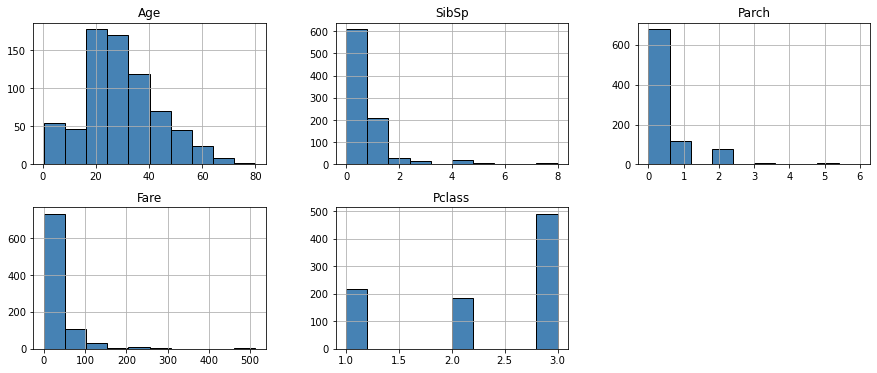

In [10]:
num_atts = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
train_data[num_atts].hist(figsize = (15, 6), color = 'steelblue', edgecolor = 'black', linewidth = 1, layout = (2, 3));
## 각 attrubute들의 분포 시각화

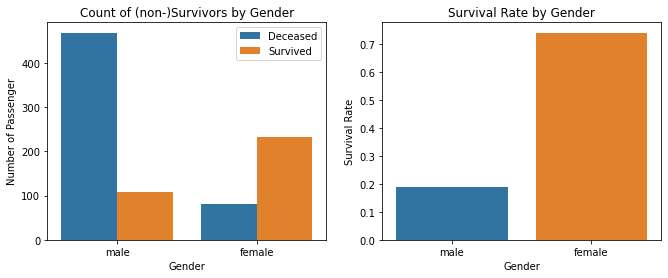

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 4))

sns.countplot(x = 'Sex', hue = 'Survived', data = train_data, ax = ax1) 
ax1.set_title('Count of (non-)Survivors by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Passenger')
ax1.legend(labels = ['Deceased', 'Survived'])

sns.barplot(x = 'Sex', y = 'Survived', data = train_data, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Survival Rate');
## 남자는 생존율이 20%, 여자는 생존률 75%

In [12]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize = 'index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


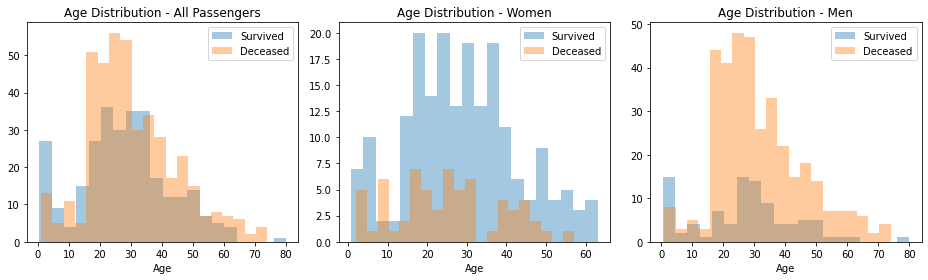

In [13]:
men = train_data[train_data['Sex']  == 'male']
women = train_data[train_data['Sex']  == 'female']

### 그래프
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13, 4))
# 생존/사망자 나이분포
sns.distplot(train_data[train_data['Survived'] == 1]['Age'].dropna(), bins = 20, label = 'Survived', ax = ax1, kde = False)
sns.distplot(train_data[train_data['Survived'] == 0]['Age'].dropna(), bins = 20, label = 'Deceased', ax = ax1, kde = False)
ax1.legend()
ax1.set_title('Age Distribution - All Passengers')
# 생존/사망자 나이분포(여자)
sns.distplot(women[women['Survived'] == 1]['Age'].dropna(), bins = 20, label = 'Survived', ax = ax2, kde = False)
sns.distplot(women[women['Survived'] == 0]['Age'].dropna(), bins = 20, label = 'Deceased', ax = ax2, kde = False)
ax2.legend()
ax2.set_title('Age Distribution - Women')
# 생존/사망자 나이분포(남자)
sns.distplot(men[men['Survived'] == 1]['Age'].dropna(), bins = 20, label = 'Survived', ax = ax3, kde = False)
sns.distplot(men[men['Survived'] == 0]['Age'].dropna(), bins = 20, label = 'Deceased', ax = ax3, kde = False)
ax3.legend()
ax3.set_title('Age Distribution - Men')

plt.tight_layout()
# 15~30세, 30~40세, 40~50세의 생존분포가 비슷함

In [14]:
train_data['Age_Bin'] = (train_data['Age']//15)*15 # 15단위로 정수화
train_data[['Age_Bin', 'Survived']].groupby(['Age_Bin']).mean() # 각 나이(0, 15, 30, 45세) 의 생존율확인

,Survived
Age_Bin,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


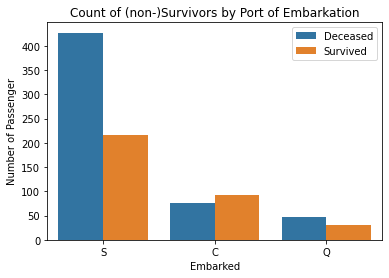

In [15]:
### Embarked 그래프
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data) 
plt.ylabel('Number of Passenger')
plt.title('Count of (non-)Survivors by Port of Embarkation')
plt.legend(['Deceased', 'Survived']);
#  (C = Cherbourg; Q = Queenstown; S = Southampton)
# 어디서 탑승했는지와 생존가능성을 연관성을 찾기가 어려워보임

In [16]:
print ('Number of passengers in each class:')
train_data['Pclass'].value_counts(sort=False)

Number of passengers in each class:


1    216
2    184
3    491
Name: Pclass, dtype: int64

Text(0, 0.5, 'Survival Rate')

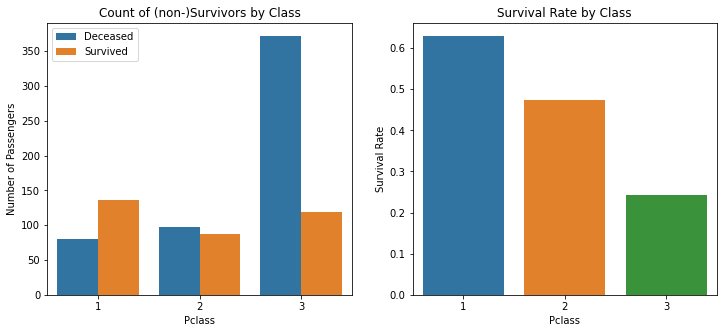

In [17]:
### 좌석클래스별 생존율 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data, ax = ax1) 
ax1.legend(['Deceased', 'Survived'])
ax1.set_title('Count of (non-)Survivors by Class')
ax1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Pclass', y = 'Survived', data = train_data, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Class')
ax2.set_ylabel('Survival Rate')
# 1등석의 생존율이 가장 높고, 3등석의 사망률이 가장 낮

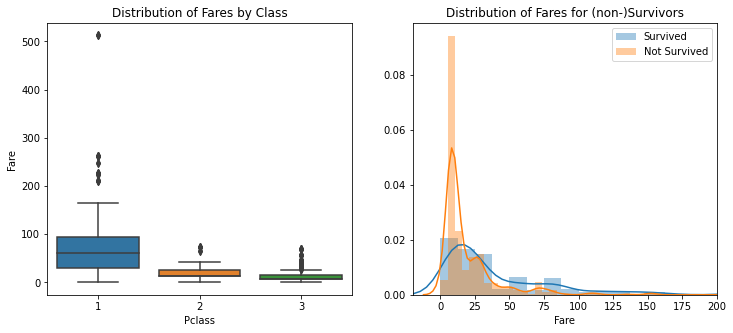

In [18]:
### 요금 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(x = 'Pclass', y = 'Fare', data = train_data, ax = ax1)
ax1.set_title('Distribution of Fares by Class')

sns.distplot(train_data[train_data['Survived'] == 1]['Fare'], label = 'Survived', ax = ax2)
sns.distplot(train_data[train_data['Survived'] == 0]['Fare'], label = 'Not Survived', ax = ax2)
ax2.set_title('Distribution of Fares for (non-)Survivors')
ax2.set_xlim([-20, 200])
ax2.legend()
# class와 fare 사이의 상관관계

In [19]:
train_data['Fare_Bin'] = pd.qcut(train_data['Fare'], 5) # 5단계로 자르기
train_data[['Fare_Bin', 'Survived']].groupby(['Fare_Bin']).mean()

,Survived
Fare_Bin,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


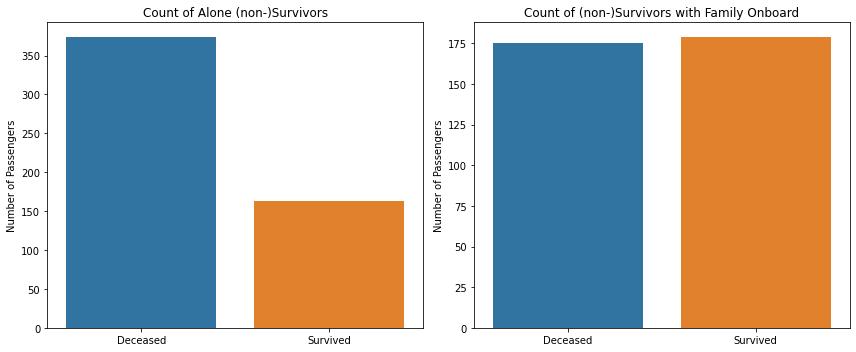

In [20]:
alone = train_data[(train_data['SibSp'] == 0) & (train_data['Parch'] == 0)]
not_alone = train_data[(train_data['SibSp'] != 0) | (train_data['Parch'] != 0)]

### 혼자인사람과 가족이있는사람 비교그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
# 혼자인사람
sns.countplot(x = 'Survived', data = alone, ax = ax1) 
ax1.set_title('Count of Alone (non-)Survivors')
ax1.set_xlabel('')
ax1.set_xticklabels(['Deceased', 'Survived'])
ax1.set_ylabel('Number of Passengers')
# 배우자, 형제, 부모, 자식이 있는사람
sns.countplot(x = 'Survived', data = not_alone, ax = ax2) 
ax2.set_title('Count of (non-)Survivors with Family Onboard')
ax2.set_xlabel('')
ax2.set_xticklabels(['Deceased', 'Survived'])
ax2.set_ylabel('Number of Passengers')

plt.tight_layout()
# 혼자인사람의 생존률이 더 낮았음.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Survival rate by Number of Relatives Onboard')

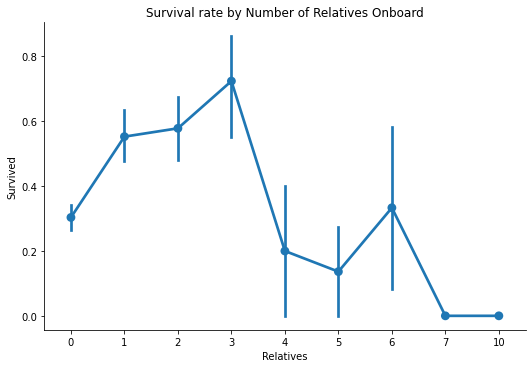

In [21]:
### 친인척의 수와 생존률과의 상관관계 그래프
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']

sns.factorplot('Relatives', 'Survived', data = train_data, aspect = 1.5)
plt.title('Survival rate by Number of Relatives Onboard')
# 1~3명의 친인척이 있다면 생존률이 올라간다고 볼 수 있음

In [22]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) # ,로 split 후 .로 split

train_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
train_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'],
                           'Rare Title', inplace = True)
train_data['Title'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

Text(0, 0.5, 'Survival Rate')

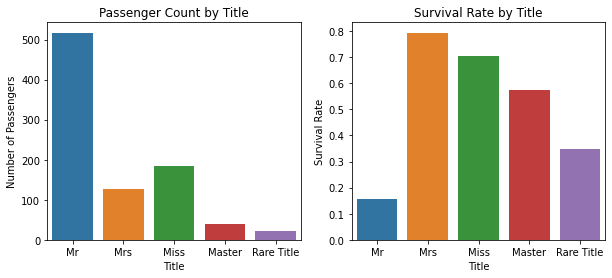

In [25]:
### 호칭(Mr, Ms, Mrs, Miss) 에 따른 생존률
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'Title', data = train_data, ax = ax1)
ax1.set_title('Passenger Count by Title')
ax1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Title', y = 'Survived', data = train_data, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Title')
ax2.set_ylabel('Survival Rate')
# 여성인 Mrs와 Miss 가 생존률이 높음
# 남성인 Mr가 생존률이 가장 낮음

In [ ]:
# 그래프의 시각화를 토대로 반영할 Attributes를 결정 :
# Sex, Age, Pclass, Fare, SibSp, Parch, Name, Ticket

In [27]:
# Age와 Fare의 공란을 중간값으로 채워넣기
all_data['Age'] = all_data['Age'].fillna(train_data['Age'].median())
all_data['Fare'] = all_data['Fare'].fillna(train_data['Fare'].median())
print ('Done!')

Done!


In [28]:
# 재가공한 데이터 열 추가하기('Family_Survival', 'Age_Bin', 'Fare_Bin', 'Relatives', 'Title).

all_data['Last_Name'] = all_data['Name'].apply(lambda x: str.split(x, ',')[0])
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace = True)

default_sr_value = 0.5
all_data['Family_Survival'] = default_sr_value

for grp, grp_data in all_data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_data) != 1):  # A Family group is found.
        for ind, row in grp_data.iterrows():
            smax = grp_data.drop(ind)['Survived'].max()
            smin = grp_data.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            
            if (smax == 1.0):
                all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 0

for _, grp_data in all_data.groupby('Ticket'):
    
    if (len(grp_data) != 1):
        for ind, row in grp_data.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_data.drop(ind)['Survived'].max()
                smin = grp_data.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                
                if (smax == 1.0):
                    all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 0
                    
#####################################################################################
all_data['Age_Bin'] = (all_data['Age']//15)*15
all_data['Fare_Bin'] = pd.qcut(all_data['Fare'], 5)
all_data['Relatives'] = all_data['SibSp'] + all_data['Parch']
#####################################################################################
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'}, inplace = True)
all_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'],
                           'Rare Title', inplace = True)    

print ('Done!')

Done!


In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
all_data['Fare_Bin'] = LabelEncoder().fit_transform(all_data['Fare_Bin'])
all_data['Age_Bin'] = LabelEncoder().fit_transform(all_data['Age_Bin'])
all_data['Title_Bin'] = LabelEncoder().fit_transform(all_data['Title'])
all_data['Sex'] = LabelEncoder().fit_transform(all_data['Sex'])

print ('Done!')

Done!


In [31]:
#나머지 필요없는 columns 지우기
all_data.drop(['PassengerId', 'Age', 'Fare', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title', 'Last_Name', 'Embarked'], axis = 1, inplace = True)

print ('Done!')
print ('Modified dataset: ')
all_data.head()

Done!
Modified dataset: 


,Survived,Pclass,Sex,Family_Survival,Age_Bin,Fare_Bin,Relatives,Title_Bin
0,0.0,3,1,0.5,1,0,1,2
1,1.0,1,0,0.5,2,4,1,3
2,1.0,3,0,0.5,1,1,0,1
3,1.0,1,0,0.0,2,4,1,3
4,0.0,3,1,0.5,2,1,0,2


In [32]:
# 데이터셋을 트레인셋과 테스트셋으로 다시 분리하고 스케일링
train_data = all_data[:891]

X_train = train_data.drop('Survived', 1)
y_train = train_data['Survived']

#######################################################

test_data = all_data[891:]

X_test = test_data.copy()
X_test.drop('Survived', axis = 1, inplace = True)
print ('Splitting: Done!')

Splitting: Done!


In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)  # fit_transform the X_train
X_test_scaled = std_scaler.transform(X_test)        # only transform the X_test

print ('Scaling: Done!')

NameError: name 'StandardScaler' is not defined